In [ ]:
!pip install pandas matplotlib seaborn scikit-learn --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
sns.set(style='whitegrid')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anikannal/solar-power-generation-data")

print("Path to dataset files:", path)

100%|██████████| 1.90M/1.90M [00:00<00:00, 97.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anikannal/solar-power-generation-data/versions/1


In [ ]:
gen_df = pd.read_csv(path + "/Plant_1_Generation_Data.csv")
weather_df = pd.read_csv(path + "/Plant_1_Weather_Sensor_Data.csv")

In [ ]:
print("Generation Data Sample:")
display(gen_df.head())

Generation Data Sample:


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
print("Weather Data Sample:")
display(weather_df.head())

Weather Data Sample:


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [ ]:
print("Missing values in Generation Data:")
print(gen_df.isnull().sum())

Missing values in Generation Data:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [ ]:
print("\nMissing values in Weather Data:")
print(weather_df.isnull().sum())


Missing values in Weather Data:
DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [ ]:
print("\nDuplicates in Generation Data:", gen_df.duplicated().sum())
print("Duplicates in Weather Data:", weather_df.duplicated().sum())


Duplicates in Generation Data: 0
Duplicates in Weather Data: 0


In [ ]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'])

/tmp/ipython-input-12-2722545080.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])


In [ ]:
merged_df = pd.merge(gen_df, weather_df, on=['DATE_TIME', 'SOURCE_KEY'])

In [ ]:
print("Merged Data Sample:")
merged_df.head()

Merged Data Sample:


,DATE_TIME,PLANT_ID_x,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


In [ ]:
merged_df['HOUR'] = merged_df['DATE_TIME'].dt.hour
merged_df['DAY'] = merged_df['DATE_TIME'].dt.day
merged_df['MONTH'] = merged_df['DATE_TIME'].dt.month
merged_df['WEEKDAY'] = merged_df['DATE_TIME'].dt.weekday

In [ ]:
merged_df = merged_df.drop(['PLANT_ID', 'DAILY_YIELD', 'TOTAL_YIELD'], axis=1, errors='ignore')

In [ ]:
X = merged_df[['HOUR', 'DAY', 'MONTH', 'WEEKDAY',
               'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

In [ ]:
y = merged_df['DC_POWER']

In [ ]:
print("Shape of merged_df:", merged_df.shape)
print("Are there any NaNs in input features?")
print(X.isnull().sum())


Shape of merged_df: (0, 13)
Are there any NaNs in input features?
HOUR                   0
DAY                    0
MONTH                  0
WEEKDAY                0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [ ]:
print("GEN DF Date Range:", gen_df['DATE_TIME'].min(), "to", gen_df['DATE_TIME'].max())
print("WEATHER DF Date Range:", weather_df['DATE_TIME'].min(), "to", weather_df['DATE_TIME'].max())


GEN DF Date Range: 2020-05-15 00:00:00 to 2020-06-17 23:45:00
WEATHER DF Date Range: 2020-05-15 00:00:00 to 2020-06-17 23:45:00


In [ ]:
print("GEN DF Source Keys:", gen_df['SOURCE_KEY'].unique()[:5])
print("WEATHER DF Source Keys:", weather_df['SOURCE_KEY'].unique()[:5])


GEN DF Source Keys: ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca']
WEATHER DF Source Keys: ['HmiyD2TTLFNqkNe']


In [ ]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME']).dt.round('H')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME']).dt.round('H')
merged_df = pd.merge(gen_df, weather_df, on='DATE_TIME', how='inner')
print("Merged shape:", merged_df.shape)
merged_df.head()

Merged shape: (291370, 12)


/tmp/ipython-input-23-1279445293.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME']).dt.round('H')
/tmp/ipython-input-23-1279445293.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME']).dt.round('H')


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0


In [ ]:
merged_df['HOUR'] = merged_df['DATE_TIME'].dt.hour
merged_df['DAY'] = merged_df['DATE_TIME'].dt.day
merged_df['MONTH'] = merged_df['DATE_TIME'].dt.month
merged_df['WEEKDAY'] = merged_df['DATE_TIME'].dt.weekday

In [ ]:
merged_df = merged_df.drop(['PLANT_ID', 'DAILY_YIELD', 'TOTAL_YIELD'], axis=1, errors='ignore')

In [ ]:
X = merged_df[['HOUR', 'DAY', 'MONTH', 'WEEKDAY',
               'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = merged_df['DC_POWER']

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (233096, 7)
Test set: (58274, 7)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation Metrics:
MAE  (Mean Absolute Error): 546.33
RMSE (Root Mean Squared Error): 1028.28
R² Score: 0.93


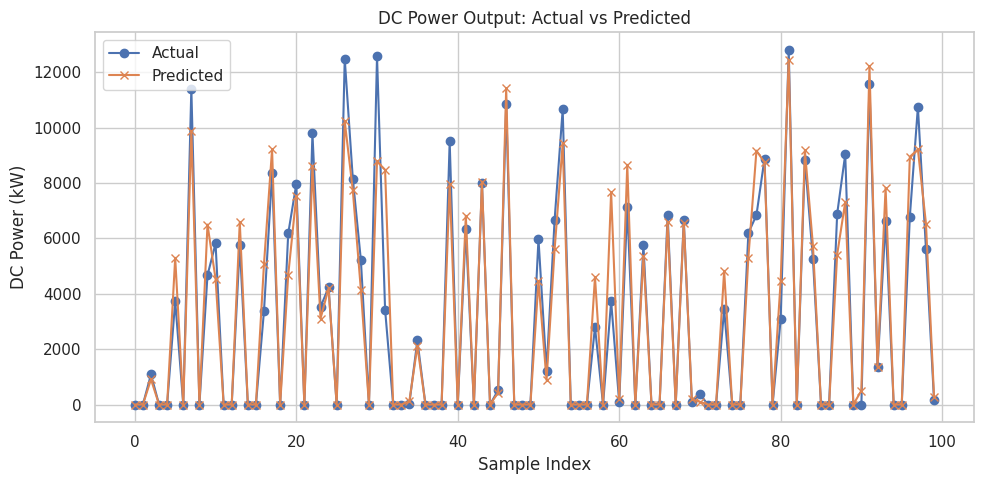

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title("DC Power Output: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("DC Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
